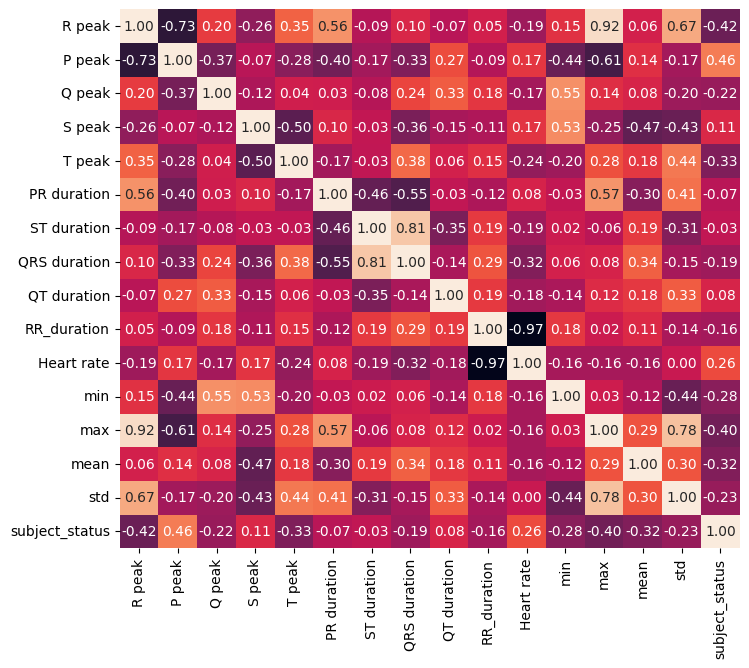

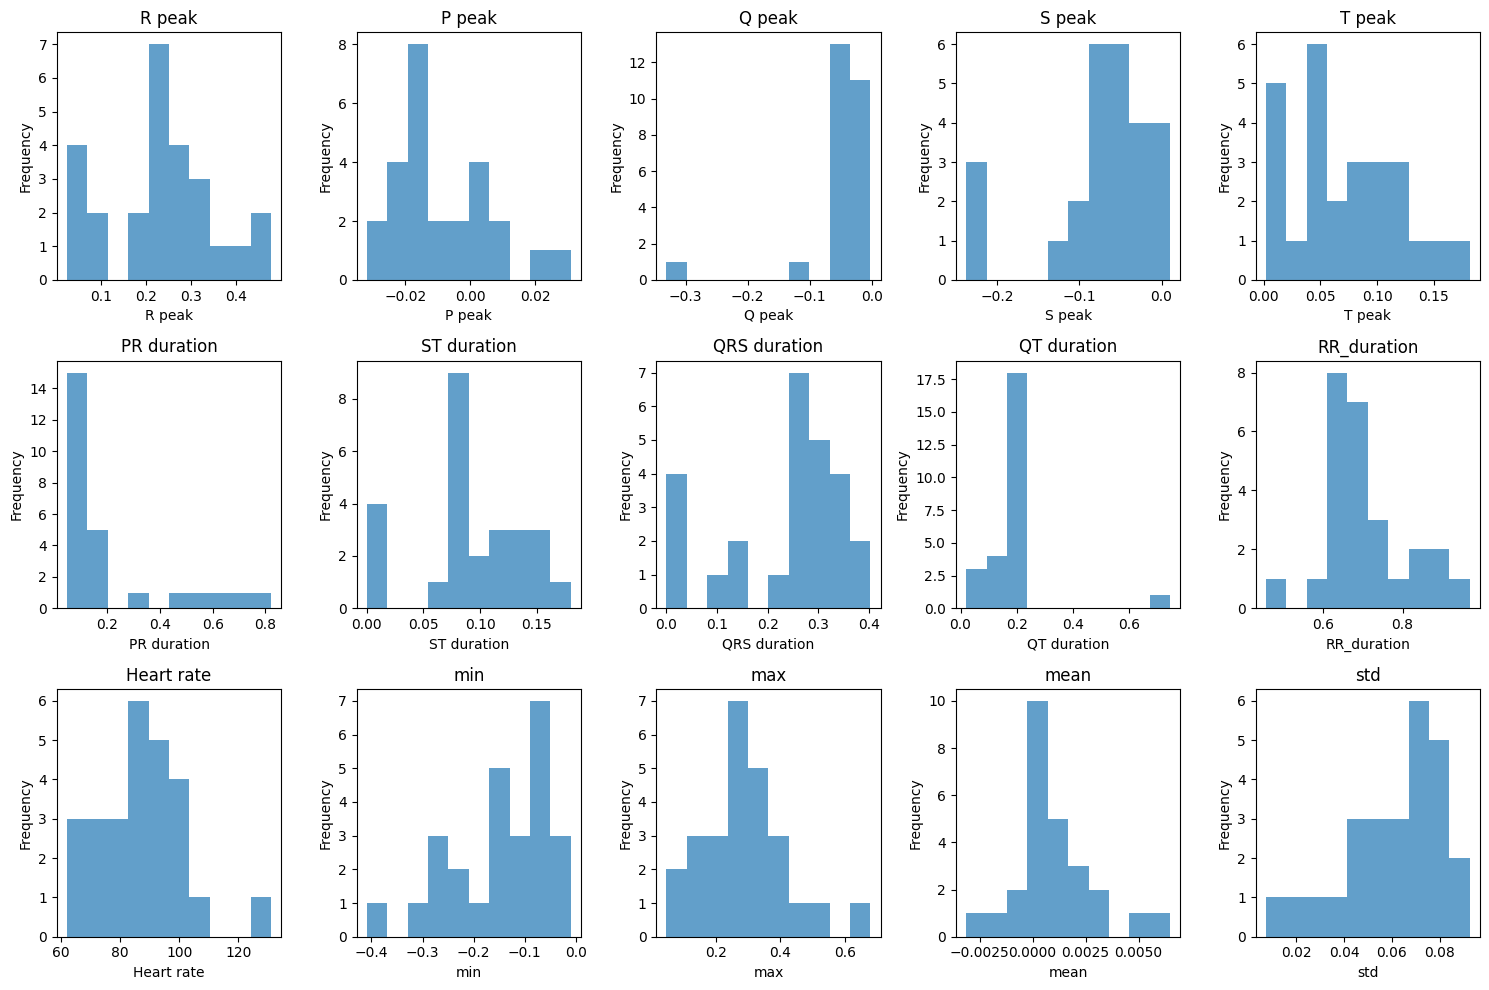

<Figure size 640x480 with 0 Axes>

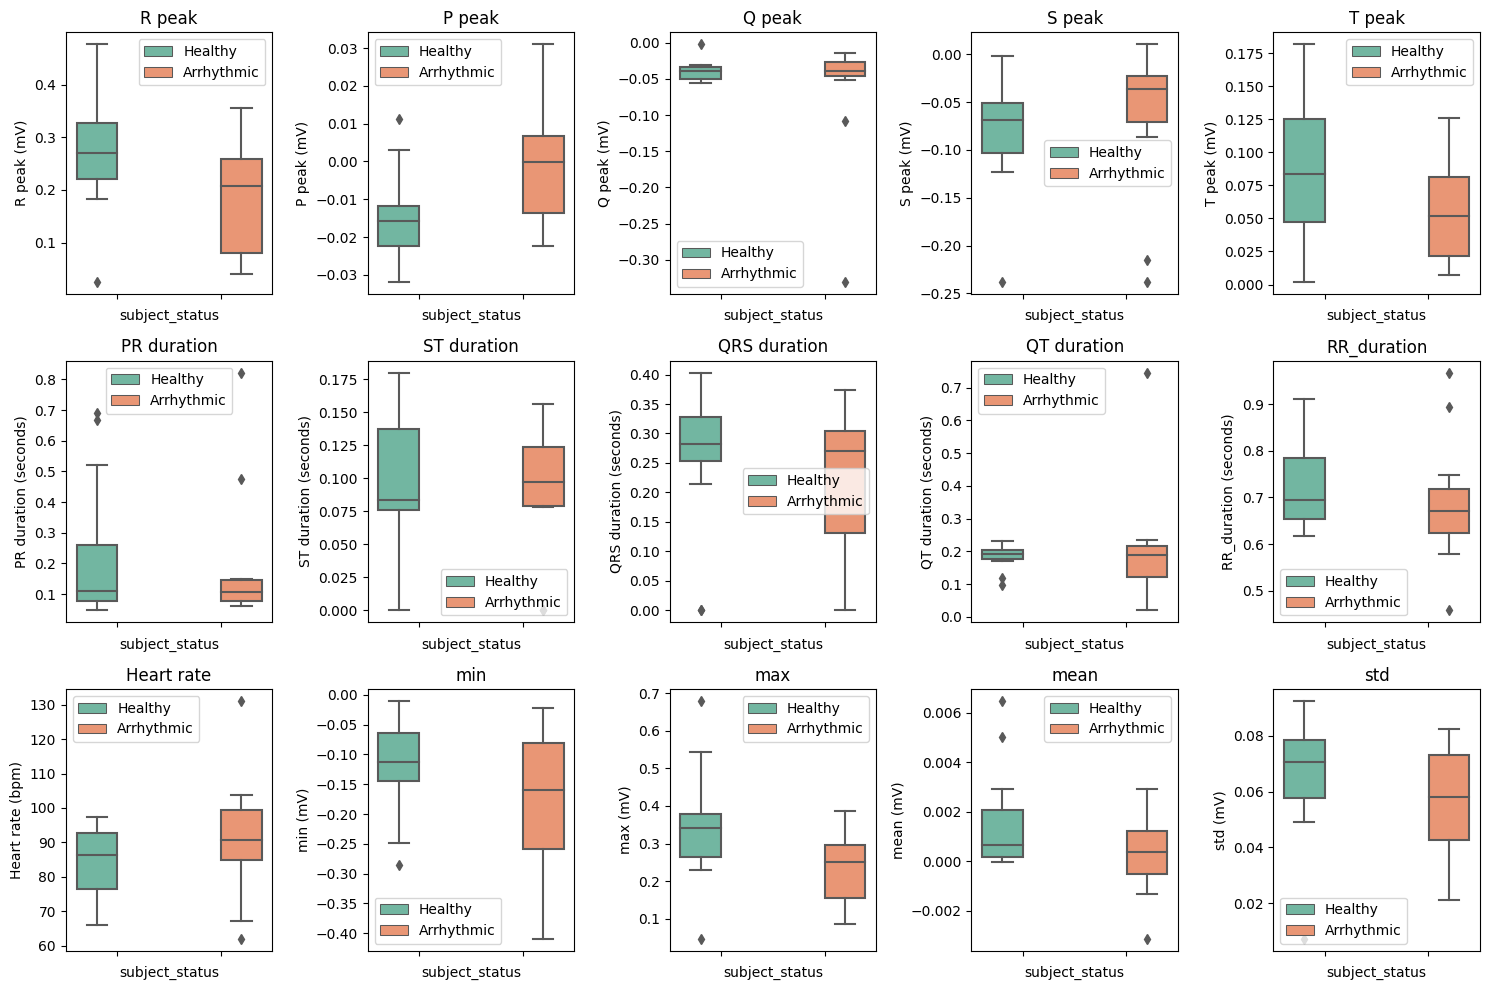

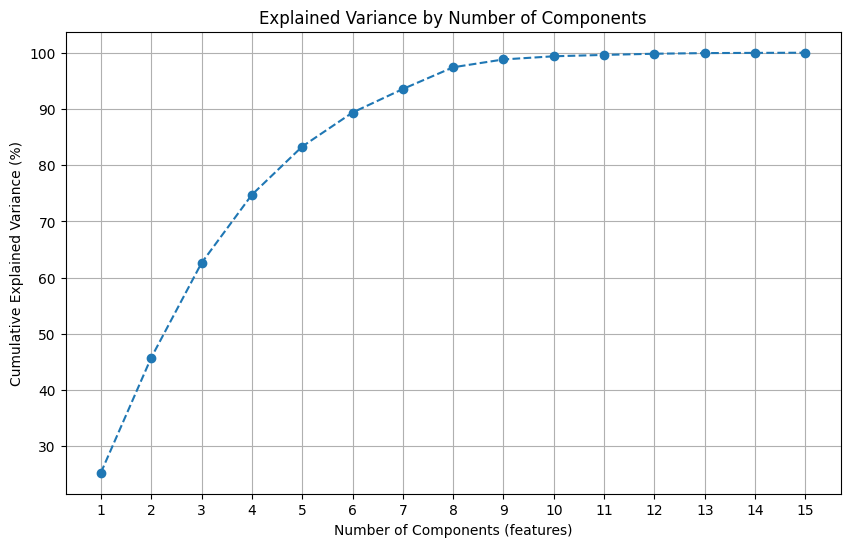

In [22]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score


def PCA_variance(feature_matrix, features):
    x = feature_matrix.loc[:, features].values
    x = StandardScaler().fit_transform(x)
       
    pca = PCA()
    pca.fit(x)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(features) + 1), cumulative_variance*100, marker='o', linestyle='--')
    plt.title('Explained Variance by Number of Components')
    plt.xlabel('Number of Components (features)')
    plt.ylabel('Cumulative Explained Variance (%)' )
    plt.xticks(np.arange(1, len(features) + 1, step=1))
    plt.savefig("Explained_Variance.png")
    plt.grid()
    plt.show()
    

def plot_PCA(final_Df, num_components):
    plt.figure(figsize=(12, 8))
    targets = [0, 1]
    colors = ['r', 'b']
    
    if num_components == 2:
        plt.scatter(final_Df.loc[final_Df['subject_status'] == 0, 'principal component 1'],
                    final_Df.loc[final_Df['subject_status'] == 0, 'principal component 2'],
                    c='r', label='healthy', s=50)
        plt.scatter(final_Df.loc[final_Df['subject_status'] == 1, 'principal component 1'],
                    final_Df.loc[final_Df['subject_status'] == 1, 'principal component 2'],
                    c='b', label='arrhythmia', s=50)
        
    elif num_components == 3:
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        for target, color in zip(targets, colors):
            indicesToKeep = final_Df['subject_status'] == target
            ax.scatter(final_Df.loc[indicesToKeep, 'principal component 1'],
                       final_Df.loc[indicesToKeep, 'principal component 2'],
                       final_Df.loc[indicesToKeep, 'principal component 3'],
                       c=color, s=50)
        
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
        ax.set_zlabel('Principal Component 3')
    
    plt.title('PCA', fontsize=20)
    plt.legend(['healthy', 'arrhythmia'])
    plt.grid()
    plt.show()

def apply_PCA(feature_matrix, num_components):
       
    array = feature_matrix.values
    X = array[:,0:15]
    y = array[:,15]

    X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1,stratify=y)

    pca = PCA(n_components=num_components)  
    fitted_object = pca.fit(X_train)
    fix_train_pca = fitted_object.transform(X_train)
    
    train_df = pd.DataFrame(data=fix_train_pca, columns=[f'principal component {i+1}' for i in range(num_components)])  

    fix_test_pca = fitted_object.transform(X_validation)

    test_df = pd.DataFrame(data=fix_test_pca, columns=[f'principal component {i+1}' for i in range(num_components)])
    return train_df, test_df, Y_train, Y_validation
    
def plot_histogram(feature_matrix, features):
    rows = 3
    cols = 5
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        feature_matrix[feature].plot.hist(ax=axes[i], alpha=0.7)
        axes[i].set_title(feature)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Frequency")
    fig.tight_layout()
    plt.show()

def plot_boxplot(feature_matrix, features):
    units = ['mV', 'mV', 'mV', 'mV', 'mV', 'seconds', 'seconds', 'seconds', 'seconds', 'seconds', 'bpm', 'mV', 'mV', 'mV', 'mV']
    
    plt.figure()
    rows = 3
    cols = 5
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 10))
    axes = axes.flatten()
    
    for i, (feature, unit) in enumerate(zip(features, units)):
        sn.boxplot(y=feature_matrix[feature], x=feature_matrix['subject_status'], hue=feature_matrix['subject_status'],
                    palette='Set2', ax=axes[i])
        axes[i].set_title(feature)
        axes[i].set_xticklabels([])
        
        # Append the unit to the y-axis label
        existing_y_label = axes[i].get_ylabel()
        axes[i].set_ylabel(existing_y_label + f' ({unit})')
        
        handles, labels = axes[i].get_legend_handles_labels()
        labels = ['Healthy', 'Arrhythmic']
        axes[i].legend(handles, labels)
    
    fig.tight_layout()
    plt.savefig('boxplot.png')
    plt.show()

# Define your list of features
features = ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5',
            'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 10',
            'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 15']

# Example usage:
# plot_boxplot(feature_matrix, features)

def format_func(value):
    return f'{value:.2f}'

features = ['R peak', 'P peak', 'Q peak', 'S peak', 'T peak', 'PR duration','ST duration', 'QRS duration', 'QT duration','RR_duration', 'Heart rate', "min", "max", "mean", "std"]
feature_matrix = pd.read_csv(r"C:\root\code\git\fetal_arrhythmia_detection\feature_matrix.csv")
num_components = 6 

plt.figure(figsize=(8, 7))
corr_matrix = feature_matrix.corr()
sn.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=False)
plt.savefig("updated_correlation_matrix.png")

plot_histogram(feature_matrix, features)
plot_boxplot(feature_matrix, features)

PCA_variance(feature_matrix, features,)
# plot_PCA(data,num_components)


train_df, test_df, Y_train, Y_validation = apply_PCA(feature_matrix, num_components)
train_df.to_csv('train_PCA.csv', index=False)
test_df.to_csv('test_PCA.csv', index=False)



